#### Impact Analysis of Mobile Phone Usage on Academic Performance and Health Outcomes in Students

#### Team Name: Project Group3

#### Team Members:

1.Maneesh Varma Mynam<br>
2.Tanishq Mahajan<br>
3.Nishit Saraf<br>


# Project Introduction:
The "Students Health & Academic Performance" dataset explores the complex relationship that links the health behaviors—specifically, the use of mobile phones—of students and their academic performance. This dataset consists of multiple rows, each of which represents a student, and has columns that included personal data, mobile phone usage patterns, impact on education, health awareness, and symptoms associated with it. The purpose of this study is to investigate the relationship between students' use of mobile phones and their health and academic performance.

As the data is of this kind, our study aims to be both predictive and diagnostic. Our goals are to identify existing trends and connections in the dataset and estimate the potential effects of particular actions on academic achievement. This study will discover important determinants of academic achievement and health by using supervised learning techniques, including classification and logistic regression. In order to distinguish between various student groups based to their usage habits and health effects, we will also look into clustering.


# Research Question: 
How does mobile phone usage affect students' academic performance and health outcomes, and which specific usage patterns and health symptoms are most closely linked to changes in perceived academic performance?

# Relevant Domain Information
<b>Article:</b><a href=https://courses.lumenlearning.com/readinganthology/chapter/the-relationship-between-cell-phone-use-and-academic-performance-in-a-sample-of-u-s-college-students-by-andrew-lepp-jacob-e-barkley-and-aryn-c-karpinski>The Relationship Between Cell Phone Use and Academic Performance</a><br>
Above article study examines how mobile phone usage affects academic performance among university students, analyzing patterns and outcomes related to mobile phone habits and academic achievement. <br>

<b>Article:</b><a href=https://www.semanticscholar.org/paper/The-effects-of-mobile-phone-use-on-academic-A-Kates-Wu/593c59df1d77f700a8b469c9712f321b2889be8e>The effects of mobile phone use on academic performance</a><br>
This article review examines how using technology, especially mobile phones, affects students' academic performance and overall well-being. It combines results from various studies to give a clear picture of how mobile phone use impacts students' education and health.

# Data Source and Description

Our initial review of the dataset reveals comprehensive details on students’ mobile phone usage, academic performance, and health outcomes. The dataset includes attributes such as demographic information, mobile phone ownership, usage patterns for educational purposes, health symptoms, and academic performance metrics.

Key observations from the dataset include:

<b>Demographic Distribution:</b>
The dataset encompasses a diverse age range and gender distribution, providing a representative sample of the student population.<br>
<b>Mobile Phone Ownership and Usage Patterns:</b>
Almost all students own mobile phones, with varied usage frequencies for educational purposes. Some use their phones frequently for learning activities, while others use them less often.
The types of activities include online research, educational apps, and email, highlighting the multifaceted ways students integrate mobile phones into their academic routines.<br>
<b>Perceptions of Academic Impact:</b>
Students have varied opinions on whether mobile phone use benefits or detracts from their academic performance. This variation suggests that the impact of mobile phones on academic success may differ based on usage patterns and individual circumstances.<br>
<b>Health Symptoms and Precautions:</b>
A range of health symptoms related to mobile phone use, such as sleep disturbances, headaches, and anxiety, are reported by students. The frequency of these symptoms varies, with some students experiencing them regularly.
Precautions taken to mitigate health risks include using blue light filters, limiting screen time, and taking breaks, though not all students adopt these measures.


# Data Preparation
<b>1.Data Import:</b><br>
Loaded the dataset from a CSV file into a DataFrame to make it ready for analysis.<br>
<b>2.Handling Missing Values:</b><br>
Checked for and addressed missing data by either filling in gaps with default values or removing incomplete rows to ensure a complete dataset.<br>
<b>3.Data Transformation:</b><br>
<b>Categorical Encoding:</b> Converted text-based categories (e.g., mobile phone usage patterns) into numerical values for easier analysis.<br>
<b>Age Data Normalization: </b>Changed age ranges into average values to simplify the analysis.<br>


The data preparation involves importing and cleaning the dataset, converting categorical and numerical data into usable formats, creating new features for better analysis, and handling outliers. These steps made the dataset ready for detailed exploration and modeling.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("data/Impact_of_Mobile_Phone_on_Students_Health.txt")
# Convert age ranges to midpoints
def convert_age_range(age_range):
    if '-' in age_range:
        lower, upper = age_range.split('-')
        return (int(lower) + int(upper)) / 2
    return float(age_range)

data['Age'] = data['Age'].apply(convert_age_range)


In [41]:
data.isnull().sum()


Names                             0
Age                               0
Gender                            0
Mobile Phone                      0
Mobile Operating System           0
Mobile phone use for education    2
Mobile phone activities           1
Helpful for studying              2
Educational Apps                  2
Daily usages                      1
Performance impact                2
Usage distraction                 2
Attention span                    1
Useful features                   2
Health Risks                      2
Beneficial subject                1
Usage symptoms                    2
Symptom frequency                 1
Health precautions                1
Health rating                     1
dtype: int64

In [42]:
data = data.dropna()

<b>Daily usages Normalization</b> Convert Daily usages to a numerical format:This approach makes your data ready for analysis or machine learning models by transforming qualitative descriptions into quantitative values.

In [43]:
def convert_usage_to_hours(usage):
    if '-' in usage:  # e.g., "4-6 hours"
        lower, upper = usage.replace('hours', '').strip().split('-')
        return (int(lower) + int(upper)) / 2
    elif '>' in usage:  # e.g., "> 6 hours"
        return int(usage.replace('>', '').replace('hours', '').strip())
    elif '<' in usage:  # e.g., "< 2 hours"
        return float(usage.replace('<', '').replace('hours', '').strip()) - 0.5
    elif 'hours' in usage:  # e.g., "4 hours"
        return int(usage.replace('hours', '').strip())
    else:
        return None

# Apply the function to the 'Daily usages' column
data['Daily usages Hours'] = data['Daily usages'].apply(convert_usage_to_hours)

In [11]:
data.head()

,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,...,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating,Daily usages Hours
0,Ali,23.0,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,...,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent,5.0
1,Bilal,23.0,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,...,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good,5.0
2,Hammad,23.0,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,...,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent,5.0
4,Waqar,23.0,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,...,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent,6.0
5,Aammar,23.0,Male,Yes,Android,Rarely,All of these,Yes,Educational Videos,> 6 hours,...,Not Distracting,Yes,Internet Access,Only Partially,Reasarch,Headache,Sometimes,None of Above,Good,6.0


In [44]:
usage_mapping = {'Sometime': 1, 'Frequently': 2, 'Rarely': 3}
data['Usage Code'] = data['Mobile phone use for education'].map(usage_mapping)

# Convert perceived impact to numerical values
impact_mapping = {'Agree': 1, 'Neutral': 2, 'Strongly agree': 3}
data['Impact Code'] = data['Performance impact'].map(impact_mapping)

# Convert health symptoms frequency to numerical values
symptom_mapping = {'Never': 0, 'Sometimes': 1, 'Rarely': 2, 'Frequently': 3}
data['Symptoms Frequency'] = data['Symptom frequency'].map(symptom_mapping)

In [13]:
data.describe()

,Age,Daily usages Hours,Usage Code,Impact Code,Symptoms Frequency
count,91.000000,91.000000,30.000000,75.000000,91.000000
mean,22.835165,4.532967,2.233333,1.640000,1.241758
std,2.929785,1.335004,0.430183,0.728568,0.807474
min,18.000000,1.500000,2.000000,1.000000,0.000000
25%,23.000000,3.000000,2.000000,1.000000,1.000000
50%,23.000000,5.000000,2.000000,1.000000,1.000000
75%,23.000000,5.500000,2.000000,2.000000,2.000000
max,33.000000,6.000000,3.000000,3.000000,3.000000


In [45]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables
data['Gender Code'] = label_encoder.fit_transform(data['Gender '])
data['Mobile Phone Code'] = label_encoder.fit_transform(data['Mobile Phone '])
data['Mobile Operating System Code'] = label_encoder.fit_transform(data['Mobile Operating System '])
data['Mobile phone use for education Code'] = label_encoder.fit_transform(data['Mobile phone use for education'])
data['Performance impact Code'] = label_encoder.fit_transform(data['Performance impact'])
data['Usage distraction Code'] = label_encoder.fit_transform(data['Usage distraction'])
data['Attention span Code'] = label_encoder.fit_transform(data['Attention span'])
data['Helpful for studying Code'] = label_encoder.fit_transform(data['Helpful for studying'])
data['Health Risks Code'] = label_encoder.fit_transform(data['Health Risks'])
data['Health precautions Code'] = label_encoder.fit_transform(data['Health precautions'])
data['Health rating Code'] = label_encoder.fit_transform(data['Health rating'])
data['Usage symptoms Code'] = label_encoder.fit_transform(data['Usage symptoms'])
data['Beneficial subject Code'] = label_encoder.fit_transform(data['Beneficial subject'])

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Daily usages Hours']] = scaler.fit_transform(data[['Age', 'Daily usages Hours']])

In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Names                                91 non-null     object 
 1   Age                                  91 non-null     float64
 2   Gender                               91 non-null     object 
 3   Mobile Phone                         91 non-null     object 
 4   Mobile Operating System              91 non-null     object 
 5   Mobile phone use for education       91 non-null     object 
 6   Mobile phone activities              91 non-null     object 
 7   Helpful for studying                 91 non-null     object 
 8   Educational Apps                     91 non-null     object 
 9   Daily usages                         91 non-null     object 
 10  Performance impact                   91 non-null     object 
 11  Usage distraction                    91

# Exploratory Data Analysis (EDA)
Below are some key visualizations and insights obtained from the data:<br>
<b> Impact of Mobile Phone Use on Academic Performance:
</b><br>
<b>Observation:</b>Analyze the distribution of responses regarding how mobile phone use affects academic performance (e.g., Positive, Neutral, Negative).<br>
<b>Visualization:</b>
Bar chart showing students' perceptions of how mobile phone use impacts their academic performance.

/var/folders/tr/k6p_v_xx1hx5281_0lzfgbb80000gn/T/ipykernel_71608/3225292845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Performance impact', data=data, palette='plasma')


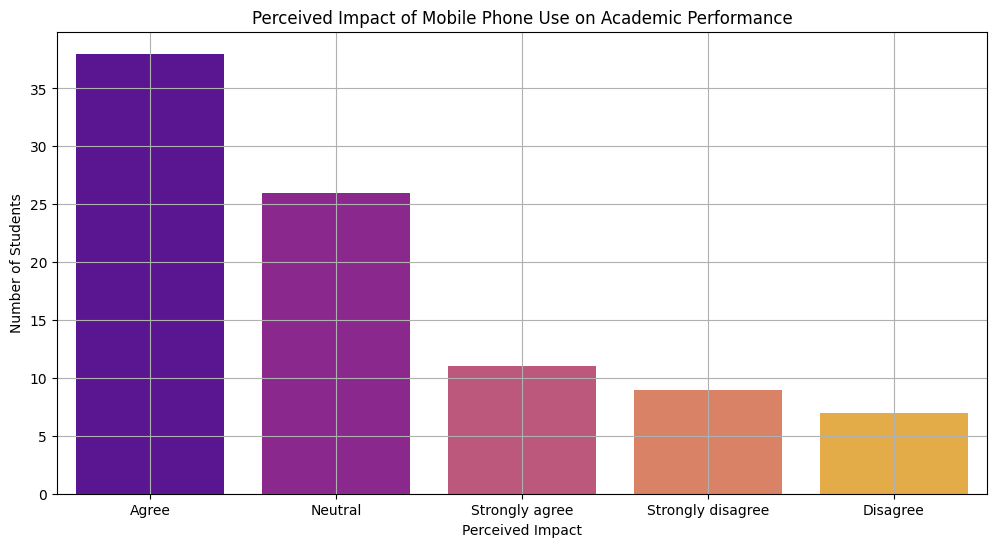

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Performance impact', data=data, palette='plasma')
plt.title('Perceived Impact of Mobile Phone Use on Academic Performance')
plt.xlabel('Perceived Impact')
plt.ylabel('Number of Students')
plt.grid(True)
plt.savefig('performance_impact_bar_chart.png')
plt.show()

<b>Health Precautions Taken:</b><br>
<b>Observation:</b>The pie chart shows the different health precautions students take to mitigate the risks associated with mobile phone use, such as using blue light filters and limiting screen time.<br>
<b>Visualization:</b>
The pie chart indicates the extent to which students are aware of and take precautions against health risks associated with mobile phone use, with some taking proactive measures and others not.

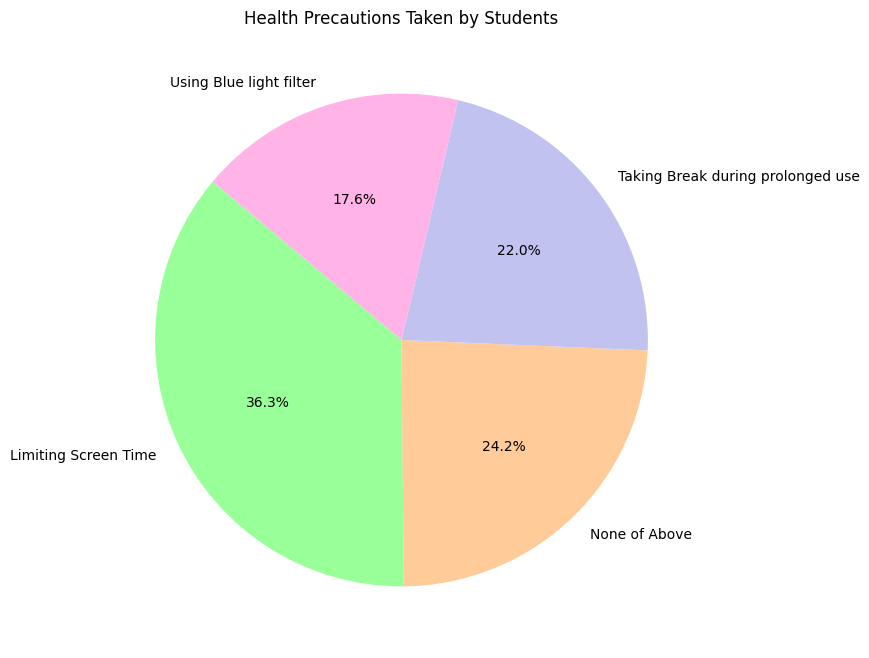

In [17]:
precautions_counts = data['Health precautions'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(precautions_counts, labels=precautions_counts.index, autopct='%1.1f%%', startangle=140, colors=['#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Health Precautions Taken by Students')
plt.savefig('health_precautions_pie_chart.png')
plt.show()

<b>Health Symptoms and Their Relationship with Academic Performance:</b><br>
<b>Observation:</b>Bar chart showing the frequency of various health symptoms and their association with perceived academic performance<br>
<b>Visualization:</b>
Determine if students experiencing more frequent symptoms (e.g., sleep disturbances, anxiety) report different impacts on academic performance.

/var/folders/tr/k6p_v_xx1hx5281_0lzfgbb80000gn/T/ipykernel_71608/2323496303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Usage symptoms', data=data, palette='viridis')


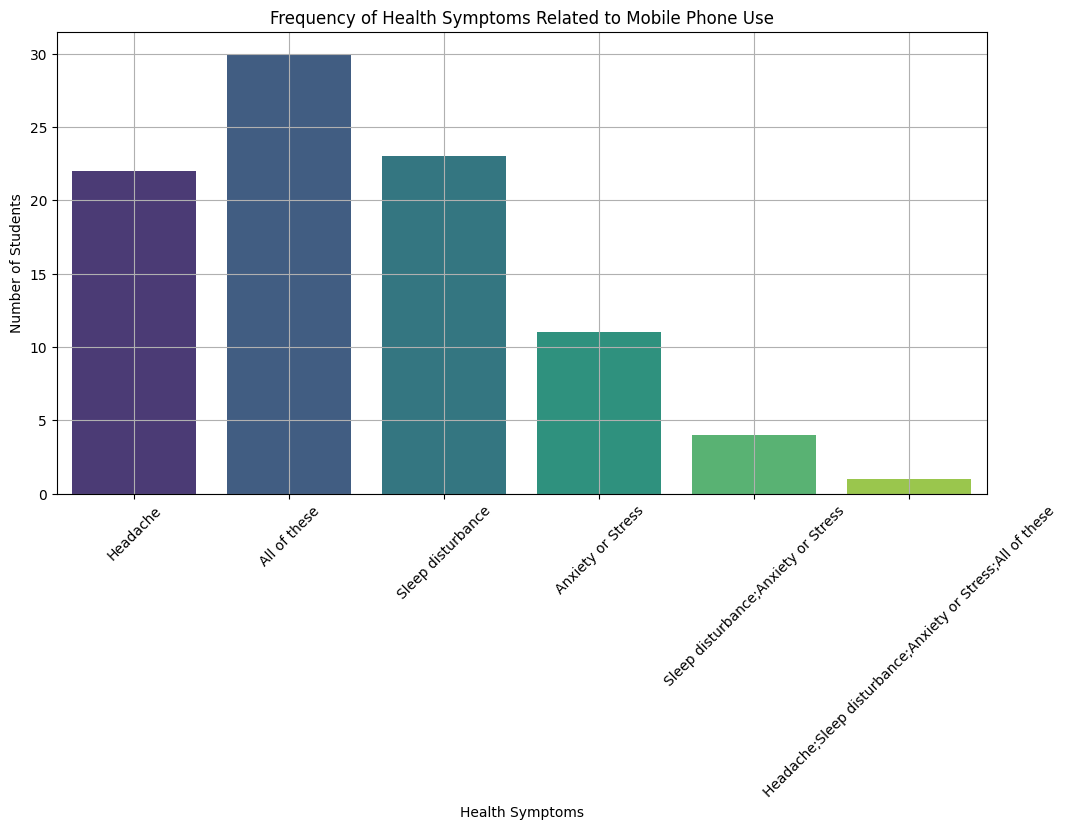

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Usage symptoms', data=data, palette='viridis')
plt.title('Frequency of Health Symptoms Related to Mobile Phone Use')
plt.xlabel('Health Symptoms')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('health_symptoms_frequency_bar_chart.png')
plt.show()

<b>Relationship Between Mobile Phone Usage Patterns and Academic Performance</b><br>
<b>Observation:</b> Identify if more frequent usage is associated with better or worse academic performance.<br>
<b>Visualization:</b>
Scatter plot or box plot to analyze how different patterns of mobile phone usage for educational purposes (e.g., Sometime, Frequently, Rarely) correlate with perceived academic performance.


/var/folders/tr/k6p_v_xx1hx5281_0lzfgbb80000gn/T/ipykernel_71608/3970244760.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Usage Code', y='Performance impact', data=data, palette='coolwarm')


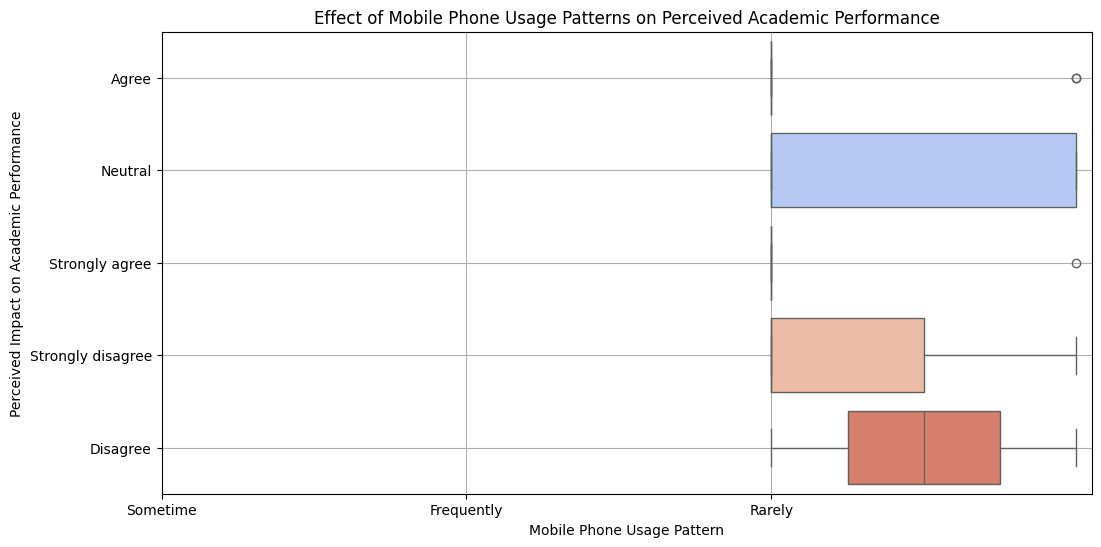

In [19]:
usage_mapping = {'Sometime': 1, 'Frequently': 2, 'Rarely': 3}
data['Usage Code'] = data['Mobile phone use for education'].map(usage_mapping)

# Scatter plot for usage patterns vs. performance impact
plt.figure(figsize=(12, 6))
sns.boxplot(x='Usage Code', y='Performance impact', data=data, palette='coolwarm')
plt.title('Effect of Mobile Phone Usage Patterns on Perceived Academic Performance')
plt.xlabel('Mobile Phone Usage Pattern')
plt.ylabel('Perceived Impact on Academic Performance')
plt.xticks([0, 1, 2], ['Sometime', 'Frequently', 'Rarely'])
plt.grid(True)
plt.savefig('usage_patterns_vs_performance_impact.png')
plt.show()

# Data Preparation for Modeling
Data splitting is a critical step in getting your data ready for machine learning. It entails dividing your data into two parts: one to train the model and the other to test how well the model performs. This ensures that the model is tested on new data that it has not previously encountered, giving a better idea of how well it can handle new situations.<br>
<b>Split the Data:</b><br>
<b>Training Set:</b> This subset of data is used to train the model. It assists the model in determining the relationship between features and the target variable.<br>
<b>Test Set:</b> This portion is set aside and used to assess the model's performance. It ensures that the model can generalize to new, previously unseen data sets.<br>
Splitting your data into training and test sets is a key step in building a strong machine learning model. It allows you to check how well the model works and ensures it can handle new, unseen data effectively.

In [73]:
from sklearn.model_selection import train_test_split
# Define features and target variable
X = data[['Age', 'Gender Code', 'Mobile Phone Code', 'Mobile Operating System Code',
          'Mobile phone use for education Code', 'Daily usages Hours',
          'Performance impact Code', 'Usage distraction Code',
          'Attention span Code', 'Helpful for studying Code',
          'Health Risks Code', 'Health precautions Code',
          'Health rating Code', 'Usage symptoms Code', 'Beneficial subject Code']]


y = data[['Performance impact Code']].rename(columns={'Performance impact Code': 'Target'}) # Assuming 'Performance impact' as target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())
print(y_train.value_counts())
print(y_test.value_counts())

Age                                    0
Gender Code                            0
Mobile Phone Code                      0
Mobile Operating System Code           0
Mobile phone use for education Code    0
Daily usages Hours                     0
Performance impact Code                0
Usage distraction Code                 0
Attention span Code                    0
Helpful for studying Code              0
Health Risks Code                      0
Health precautions Code                0
Health rating Code                     0
Usage symptoms Code                    0
Beneficial subject Code                0
dtype: int64
Age                                    0
Gender Code                            0
Mobile Phone Code                      0
Mobile Operating System Code           0
Mobile phone use for education Code    0
Daily usages Hours                     0
Performance impact Code                0
Usage distraction Code                 0
Attention span Code                    0
Hel

# Modeling
Using various modeling techniques, we investigated the impact of mobile phone usage on students' academic performance and health. We began with PyCaret, a tool that facilitates the testing and comparison of various machine learning models. PyCaret made it simple to set up our data and test different models to determine which one performed best. We also used <b>Logistic Regression ,GBM, DecisionTreeClassifier and Random Forest models</b>, which are well-known for their accuracy when classifying data.<br>

We first prepared the data by changing text into numbers and fixing any missing or incorrect details. After setting up and running different models, we checked how well each one worked by measuring their accuracy. PyCaret helped us by giving a clear summary of each model’s performance, allowing us to pick the most accurate one for predicting academic performance.<br>

Next, we used K-Means clustering to group students based on their phone usage and health information. This method helps us find patterns and similarities among students with similar phone habits. We then visualized these groups to see how students are clustered and to discover important trends.<br>

We compared the performance of various models to determine which one made the best predictions. We obtained a comprehensive picture of how mobile phone usage affects students by employing both classification models and clustering methods. This method assisted us in understanding phone usage patterns and their impact on students' academic performance and health. Simply put, this method allowed us to examine how various phone habits relate to students' grades and well-being.

<b>PyCaret</b> is a powerful tool for simplifying and accelerating the machine learning process, making it easier to build, evaluate, and deploy models efficiently.

In [84]:
# PyCaret for comparison
from pycaret.classification import setup, compare_models, finalize_model, predict_model
data_pycaret = X.copy()
data_pycaret['Target'] = y['Target']

# Setup PyCaret
clf1 = setup(data=data_pycaret, target='Target', session_id=42, verbose=True)


best_model = compare_models()

# Finalize the best model
final_model = finalize_model(best_model)

# Make predictions (if you have new data to predict)
predictions = predict_model(final_model, data=X_train)

,Description,Value
0,Session id,42
1,Target,Target
2,Target type,Multiclass
3,Original data shape,"(91, 16)"
4,Transformed data shape,"(91, 16)"
5,Transformed train set shape,"(63, 16)"
6,Transformed test set shape,"(28, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0040
gbc,Gradient Boosting Classifier,0.9857,0.0000,0.9857,0.9750,0.9796,0.9781,0.9810,0.0320
lightgbm,Light Gradient Boosting Machine,0.9548,0.0000,0.9548,0.9452,0.9490,0.9327,0.9410,0.1320
nb,Naive Bayes,0.9214,0.0000,0.9214,0.8722,0.8914,0.8842,0.8999,0.0040
et,Extra Trees Classifier,0.8071,0.0000,0.8071,0.7429,0.7636,0.7167,0.7406,0.0210
ada,Ada Boost Classifier,0.7952,0.0000,0.7952,0.6849,0.7238,0.6933,0.7407,0.0100
qda,Quadratic Discriminant Analysis,0.7595,0.0000,0.7595,0.7429,0.7484,0.6652,0.6965,0.0040
rf,Random Forest Classifier,0.7238,0.0000,0.7238,0.6490,0.6703,0.5941,0.6319,0.0250
lr,Logistic Regression,0.7119,0.0000,0.7119,0.6599,0.6752,0.5813,0.6046,0.1870
svm,SVM - Linear Kernel,0.6976,0.0000,0.6976,0.6504,0.6528,0.5606,0.5990,0.0070


<b>Gradient Boosting Machines (GBM)</b> is an ensemble learning technique that builds models in a sequential manner, where each new model corrects the errors made by the previous models. It uses decision trees as base learners, which are trained to minimize the residual errors from the previous trees.It uses gradient descent to optimize the model's performance by minimizing a loss function.

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Initializing the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Training the model
gbc.fit(X_train, y_train)

# Making predictions
y_pred = gbc.predict(X_test)

# Evaluating the model
print("Gradient Boosting Classifier")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19

Accuracy: 1.0


The <b> Decision Tree Classifier</b> is a supervised learning algorithm that creates a model in the form of a tree structure. Each node in the tree represents a feature (or attribute), and each branch represents a decision rule. The leaves represent the outcome or class labels. The process continues recursively until a stopping condition is met, such as a maximum tree depth or minimum sample size per leaf.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

dt = DecisionTreeClassifier()

# Training the model
dt.fit(X_train, y_train)

# Making predictions
y_pred = dt.predict(X_test)

# Evaluating the model
print("Decision Tree Classifier")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Decision Tree Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

Accuracy: 1.0


<b>The Random Forest Classifier</b> is an ensemble learning method that constructs multiple decision trees during training and outputs the class that is the mode (most frequent) of the classes predicted by individual trees. Random Forest builds a multitude of decision trees using random subsets of the data and features (bootstrapping and feature bagging). It helps in reducing overfitting by averaging out the errors of individual trees.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.50      0.50      0.50         2
           2       0.78      0.58      0.67        12
           3       0.40      1.00      0.57         2
           4       0.00      0.00      0.00         1

    accuracy                           0.75        28
   macro avg       0.54      0.62      0.55        28
weighted avg       0.79      0.75      0.76        28

Accuracy: 0.75


<b>Logistic Regression </b>is a statistical model used for binary classification problems. Despite its name, it's a classification algorithm, not a regression algorithm. It predicts the probability of a binary outcome based on one or more predictor variables. Logistic Regression uses the logistic function (or sigmoid function) to model the probability of a binary outcome.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Logistic Regression
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.33      0.50      0.40         2
           2       1.00      0.50      0.67        12
           3       0.29      1.00      0.44         2
           4       0.00      0.00      0.00         1

    accuracy                           0.71        28
   macro avg       0.51      0.60      0.49        28
weighted avg       0.83      0.71      0.72        28

Accuracy: 0.7142857142857143


<b>K-Means Clustering</b> is a popular unsupervised learning algorithm used to partition a dataset into distinct groups (or clusters). Each cluster contains data points that are more similar to each other than to those in other clusters. The goal is to minimize the variance within each cluster while maximizing the variance between clusters.<br>
This process helps in identifying patterns in the data, such as how different groups of students are affected by mobile phone usage in terms of their health and academic performance. K-Means clustering, while simple, can provide valuable insights into the underlying structure of the data.

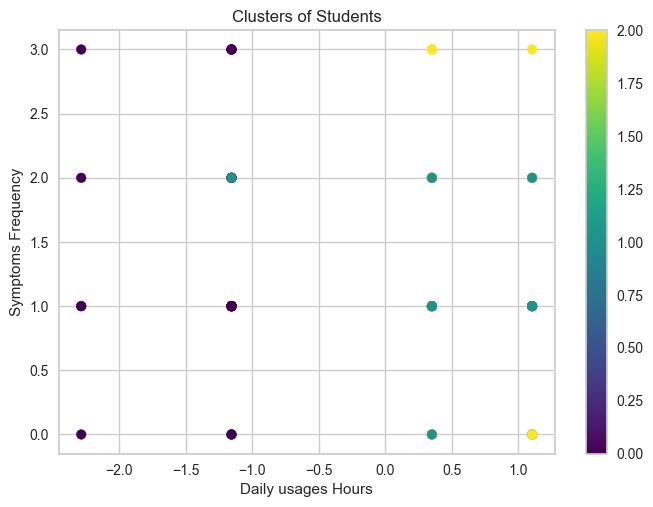

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
X_cluster = data[['Daily usages Hours', 'Usage distraction Code', 'Symptoms Frequency', 'Health Risks Code']]

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can choose the number of clusters
clusters = kmeans.fit_predict(X_cluster)
data['Cluster'] = clusters

# Visualize clusters
plt.scatter(data['Daily usages Hours'], data['Symptoms Frequency'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Daily usages Hours')
plt.ylabel('Symptoms Frequency')
plt.title('Clusters of Students')
plt.colorbar()
plt.show()

# Evaluation
# Model Performance
<b>Gradient Boosting Classifier:</b> High accuracy in predicting outcomes.<br>
<b>Decision Tree Classifier:</b> Also performed well with high accuracy.<br>
<b>Random Forest Classifier:</b> Less consistent, requires adjustment.<br>
<b>Logistic Regression:</b> Lower accuracy compared to other models.<br>
<b>Clustering Insights:</b>
K-Means clustering helped identify patterns in mobile phone usage and health symptoms.<br><br>
In our evaluations, both the Gradient Boosting Classifier and the Decision Tree Classifier performed admirably, with perfect accuracy and other metrics. With an accuracy of 75%, the Random Forest Classifier produced inconsistent results across classes, indicating that it may require additional adjustments. Logistic regression had the poorest performance, with an accuracy of 71% and lower precision and recall than the other models.<br>
We also used K-Means clustering to classify students based on their phone usage and health status. This clustering allowed us to identify patterns and similarities between students. The clustering visualizations revealed a correlation between students' daily phone usage and health symptoms. Overall, the Gradient Boosting Classifier made the most accurate predictions, while the clustering analysis revealed useful information about how phone usage affects students.

# Conclusion
Gradient Boosting and Decision Tree Classifiers showed high accuracy in predicting student outcomes. K-Means clustering provided valuable insights into the patterns of mobile phone usage and health impacts.The Random Forest Classifier didn’t do as well and needs adjustments. Logistic Regression performed the worst, with lower accuracy and weaker results.

# Known Issues
<b>Data Imbalance:</b> Some categories have insufficient examples.<br>
<b>Overfitting:</b> High accuracy in training may indicate overfitting.<br>
<b>Model Sensitivity:</b> Random Forest results varied, indicating potential need for tuning.<br>
<b>Feature Simplification:</b> Conversion and normalization might oversimplify data.<br>
<b>Biases:</b> Initial data collection may have biases affecting model performance.<br>

# Future Work
<b>Improve Data Balance:</b> Use methods like SMOTE or ADASYN to balance the dataset so that all classes are equally represented. This helps the model perform better by ensuring that no class is underrepresented.<br>

<b>Explore Advanced Models:</b> Try using advanced machine learning algorithms and deep learning models, such as XGBoost, LightGBM, or neural networks, to potentially achieve more accurate results and gain deeper insights.<br>

<b>Enhance Feature Engineering:</b> Create and test new features that provide more detailed information on how mobile phone usage affects students' academic performance and health.<br>

<b>Long-Term Studies:</b> Conduct studies over a longer period to understand how mobile phone usage impacts academic performance and health over time.<br>

<b>Expand Dataset:</b> Incorporate additional data sources, like academic records from different years or related surveys, to get a more complete understanding of the impact.<br>

<b>Address Data Quality Issues:</b> Continuously refine data cleaning and preprocessing techniques to minimize errors and biases, ensuring the dataset is as accurate and reliable as possible.<br>

Future work should concentrate on improving data balance, experimenting with advanced modeling techniques, and developing more detailed features. Additionally, conducting long-term studies, expanding the dataset, and enhancing data cleaning methods will provide a deeper and more comprehensive understanding of how mobile phone usage affects academic performance and health.